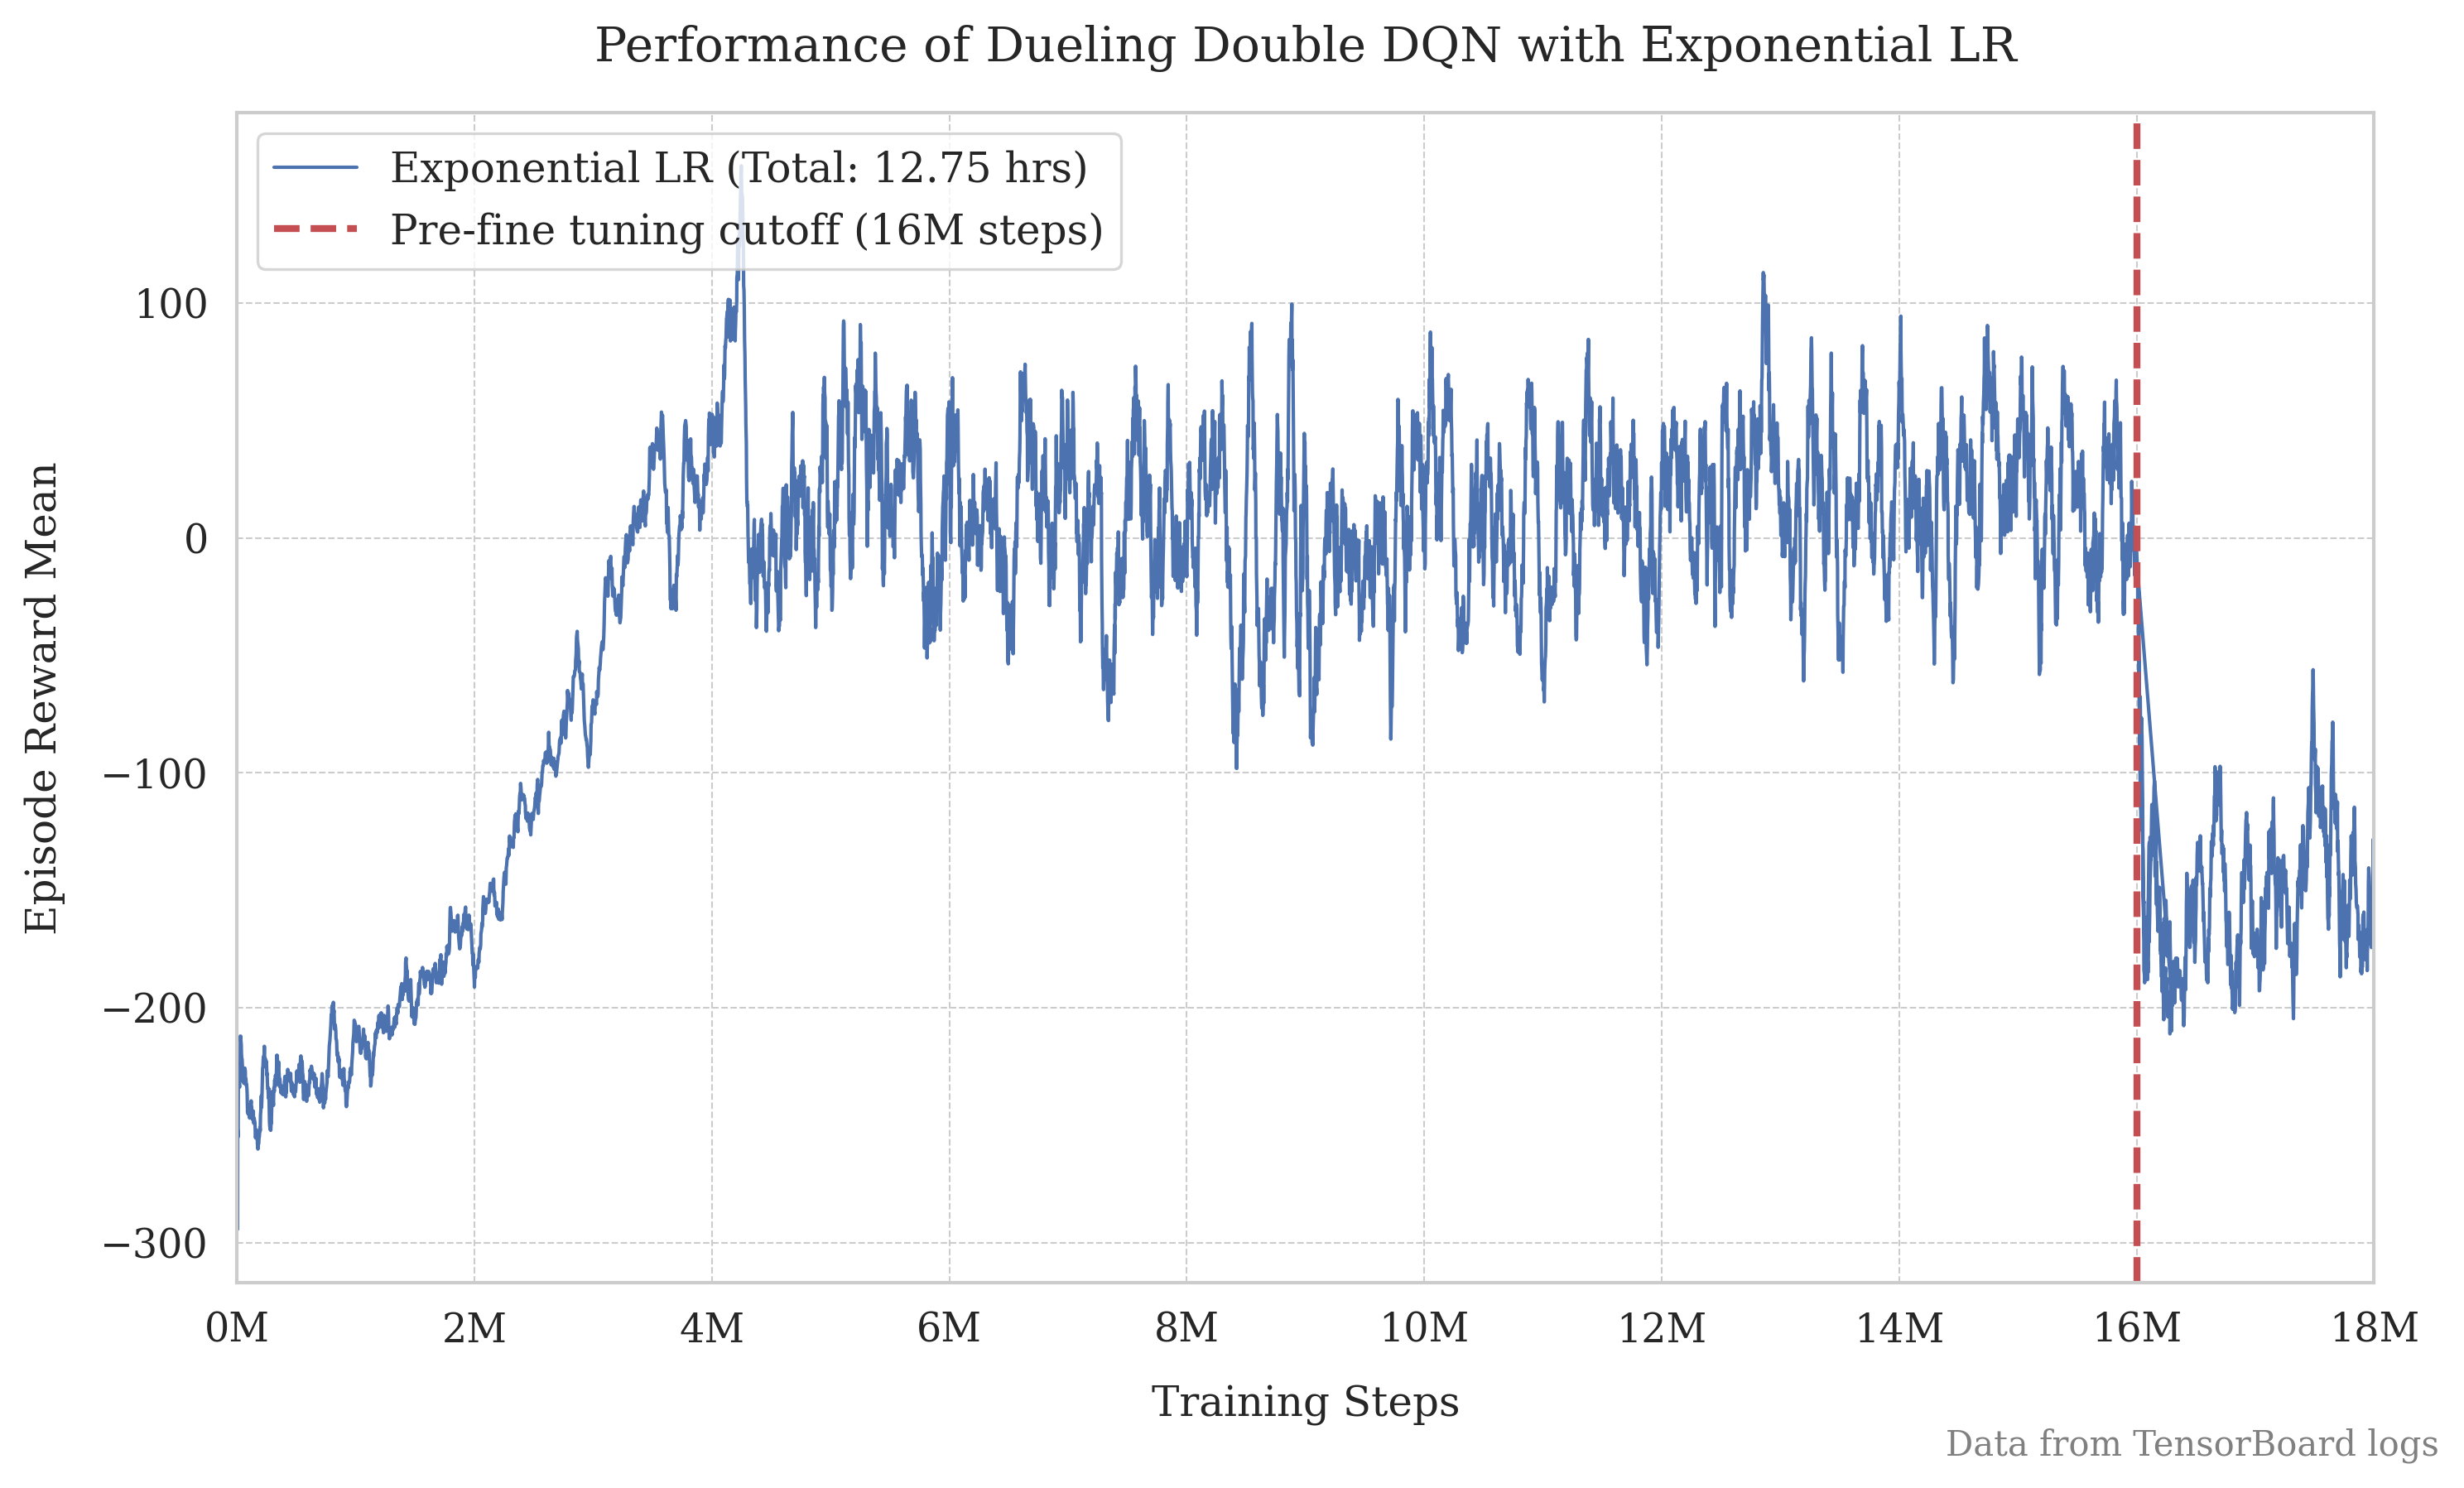

In [15]:
# Note: ChatGPT assisted in generating the following cell code for visualization.
"""
This cell loads TensorBoard scalar data from a specified log directory and creates
a performance plot for a Dueling Double DQN experiment with an Exponential Learning Rate.
The plot spans 18M training steps and includes a vertical cutoff at 16M steps to indicate
the pre-fine tuning phase.

The visualization is styled with an academic and elegant design suitable for publications.
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator

def load_tensorboard_df(log_dir, tag='rollout/ep_rew_mean'):
    """
    Load TensorBoard scalar data for a specific tag from the given log directory.

    Parameters:
        log_dir (str): Path to the TensorBoard log directory.
        tag (str): TensorBoard tag to extract scalar data. Defaults to 'rollout/ep_rew_mean'.

    Returns:
        pd.DataFrame: DataFrame containing 'wall_time', 'step', and 'value' columns for the specified tag.
    """
    ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
    ea.Reload()  # Reload events from the log directory.
    events = ea.Scalars(tag)
    # Construct DataFrame from the event data.
    df = pd.DataFrame(
        [(e.wall_time, e.step, e.value) for e in events],
        columns=['wall_time', 'step', 'value']
    )
    return df

# Define the log directory for the Exponential Learning Rate Experiment.
# Assumes the notebook is in 'root/notebooks/' and experiment data is in
# 'root/experiments_finals/curriculum/DQN_3'.
base_log_dir = os.path.join('..', 'experiments_finals', 'curriculum', 'DQN_3')
tag = 'rollout/ep_rew_mean'
df_exp = load_tensorboard_df(base_log_dir, tag=tag)

# Compute total wall time (in hours) for context in the legend.
total_hours_exp = (df_exp['wall_time'].iloc[-1] - df_exp['wall_time'].iloc[0]) / 3600

# Set an academic, elegant plot style using a commonly available serif font.
sns.set_context("paper", font_scale=1.3)
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.color': '0.8'
})
plt.rcParams.update({
    'font.family': 'DejaVu Serif',  # Using a widely available serif font.
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'lines.linewidth': 1.0,
    'lines.markersize': 6,
    'legend.fontsize': 12,
    'figure.dpi': 300,
})

# Define a custom color palette for a visually pleasing academic look.
colors = {
    'primary': '#4C72B0',       # Soft academic blue for the main data line.
    'complementary': '#55A868', # Calm green (available for secondary elements).
    'accent': '#C44E52',        # Muted red for highlighting (vertical cutoff).
    'support': '#8172B3'        # Subtle purple for additional elements.
}

# Create the figure and axis for the plot.
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Set the x-axis to span 18M steps.
max_step = int(18e6)  # 18M steps.
ticks = np.linspace(0, max_step, 10)
ax.set_xticks(ticks)
# Format tick labels to display values in millions (e.g., "0M", "2M", ..., "18M").
ax.set_xticklabels([f'{int(tick/1e6)}M' for tick in ticks])
ax.set_xlim(0, max_step)

# Plot the reward curve using the primary color.
ax.plot(
    df_exp['step'], df_exp['value'],
    color=colors['primary'],
    label=f'Exponential LR (Total: {total_hours_exp:.2f} hrs)'
)

# Add a vertical dashed line at 16M steps to mark the pre-fine tuning phase.
ax.axvline(
    x=int(16e6),  # 16M steps.
    color=colors['accent'],
    linestyle='--',
    linewidth=2,
    label='Pre-fine tuning cutoff (16M steps)'
)

# Set axis labels and plot title with refined academic styling.
ax.set_xlabel('Training Steps', labelpad=10)
ax.set_ylabel('Episode Reward Mean', labelpad=10)
ax.set_title('Performance of Dueling Double DQN with Exponential LR', pad=15)

# Add a legend with a frame in the upper left corner.
ax.legend(loc='upper left', frameon=True)

# Enable a subtle grid for enhanced readability.
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add an annotation at the bottom right for data provenance.
plt.figtext(0.99, 0.01, "Data from TensorBoard logs", horizontalalignment='right',
            fontsize=10, color='gray')

# Adjust layout to minimize clipping and save the figure as a PDF.
plt.tight_layout()
plt.savefig('outputs/kane_curriculum_train.pdf', format='pdf', bbox_inches='tight')
plt.show()
